In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [2]:
df = pd.read_excel("/home/alihan/Desktop/UVA 2023-2024/Data Systems Project/Data/Stormdata & FireStations.xlsx")
df = df.iloc[::-1]
df = df.set_index('Date')

df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

df

,Incident_ID,Incident_Starttime,Incident_Endtime,Incident_Duration,Incident_Priority,Service_Area,Municipality,Damage_Type,LON,LAT,Day,Month,Year
Date,,,,,,,,,,,,,
2005-04-07,11333,12:09:51,13:38:19,01:28:28,3.0,IJsbrand,AMSTERDAM,Other,4.887098,52.418767,7,4,2005
2005-04-07,11337,12:53:52,13:57:46,01:03:54,2.0,Pieter,AMSTERDAM,Other,4.826198,52.352551,7,4,2005
2005-04-07,11337,12:53:52,13:57:46,01:03:54,2.0,Pieter,AMSTERDAM,Tree,4.826198,52.352551,7,4,2005
2005-11-25,24071,10:35:23,11:35:20,00:59:57,1.0,Amstelveen,OUDER-AMSTEL,Tree,4.916936,52.297115,25,11,2005
2005-11-25,24028,07:25:02,07:41:25,00:16:23,3.0,Dirk,AMSTERDAM,Other,4.894682,52.359381,25,11,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-08,439079,00:51:36,02:20:34,01:28:58,2.0,Teunis,Amsterdam,Other,4.879589,52.392941,8,9,2023
2023-09-08,439079,00:51:36,02:20:34,01:28:58,2.0,Teunis,Amsterdam,Building,4.879589,52.392941,8,9,2023
2023-09-09,439150,04:42:15,05:06:44,00:24:29,2.0,Hendrik,Amsterdam,Other,4.878302,52.368084,9,9,2023


In [3]:
df['Incident_Duration'] = df['Incident_Duration'].astype(str)
df['Incident_Duration'] = round(pd.to_timedelta(df['Incident_Duration']).dt.total_seconds() / 60,3)

In [45]:
geolocator = Nominatim(user_agent="my_request")
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
    Latitude = row['LAT']
    Longitude = row['LON']
    
    location = geolocator.reverse(f"{Latitude},{Longitude}")
    address = location.raw['address']
    
    city = str(address.get('city', ''))  
    suburb = str(address.get('suburb', '')) 
    residential = str(address.get('residential', ''))  
    road = str(address.get('road'))  
    zipcode = str(address.get('postcode'))  
    
    df.at[index, 'City'] = city
    df.at[index, 'Suburb'] = suburb
    df.at[index, 'Residential'] = residential
    df.at[index, 'Road'] = road
    df.at[index, 'Zipcode'] = zipcode

Processing: 100%|██████████| 5293/5293 [44:25<00:00,  1.99it/s]  


In [4]:
df = pd.read_csv(r'Stormdata & FireStations geadresseerd.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Incident_ID')
df

,Incident_Starttime,Incident_Endtime,Incident_Duration,Incident_Priority,Service_Area,Damage_Type,Municipality,LON,LAT,Day,Month,Year,City,Suburb,Residential,Road,Zipcode
Incident_ID,,,,,,,,,,,,,,,,,
511,08:25:18,10:00:56,95.633,2.0,Amstelveen,Tree,Amstelveen,4.838685,52.281552,7,9,2018,NaN,NaN,NaN,Bouwerij,1185 XW
738,16:46:38,18:00:55,74.283,2.0,Victor,Tree,Amsterdam,4.930968,52.359724,10,9,2018,Amsterdam,Oost,Dapperbuurt,Linnaeusplantsoen,1093 KL
739,17:11:20,18:01:00,49.667,2.0,Dirk,Building,Amsterdam,4.898818,52.357071,10,9,2018,Amsterdam,Zuid,Oude Pijp,Nicolaas Berchemstraat,1073 VR
1335,19:17:33,20:41:29,83.933,2.0,Zebra,"Fence, Road signs, Scaffolding",Amsterdam,4.960809,52.392155,18,9,2018,Amsterdam,Noord,Nieuwendam,Markengouw,1024 CX
1493,06:59:05,08:21:25,82.333,2.0,Amstelveen,Tree,Amstelveen,4.879741,52.301365,21,9,2018,NaN,NaN,NaN,Oranjebaan,1183 PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,18:03:05,19:18:29,75.400,2.0,Nico,Other,Amsterdam,4.896493,52.370812,7,9,2023,Amsterdam,Centrum,Burgwallen-Oude Zijde,Oudezijds Achterburgwal,1012 DJ
439079,00:51:36,02:20:34,88.967,2.0,Teunis,Other,Amsterdam,4.879589,52.392941,8,9,2023,Amsterdam,West,Revaleiland,Revaleiland,1014 ZG
439150,04:42:15,05:06:44,24.483,2.0,Hendrik,Other,Amsterdam,4.878302,52.368084,9,9,2023,Amsterdam,Centrum,NaN,Marnixstraat,1016 XS


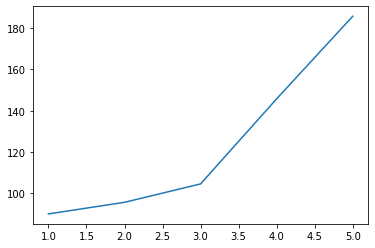

In [5]:
plt.plot(list(range(1, 6)), list(df.groupby(['Incident_Priority'])['Incident_Duration'].mean()))

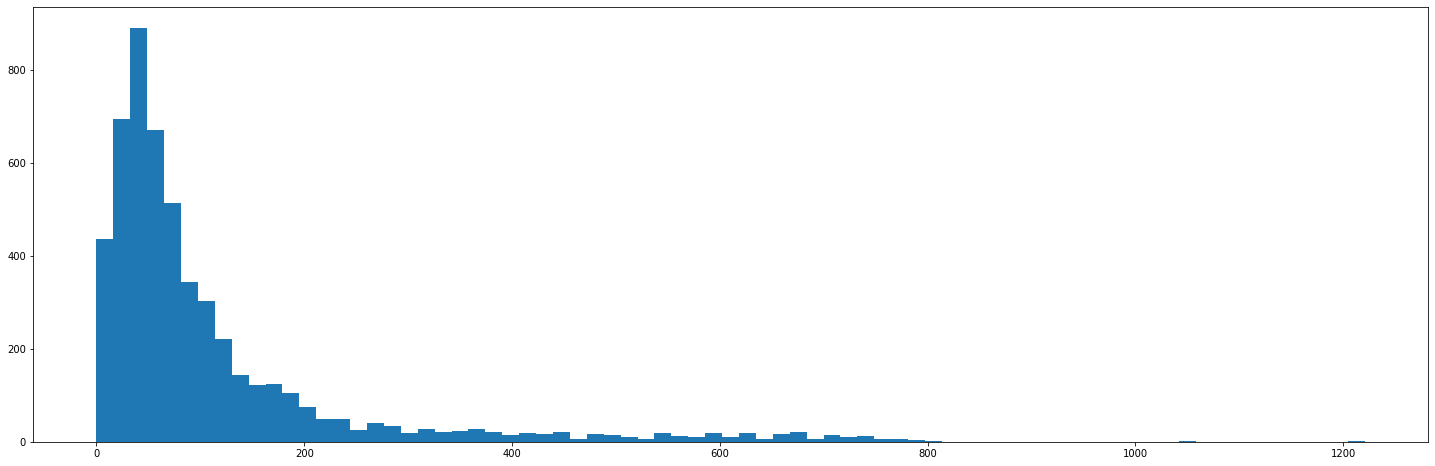

In [6]:
plt.figure(figsize = (25,8))
plt.hist(df['Incident_Duration'], 75)
plt.show()

In [7]:
df.Service_Area.unique().tolist()

['Amstelveen',
 'Victor',
 'Dirk',
 'Zebra',
 'Teunis',
 'Nico',
 'Anton',
 'Pieter',
 'Willem',
 'Aalsmeer',
 'Hendrik',
 'Osdorp',
 'Duivendrecht',
 'Diemen',
 'Driemond',
 'IJsbrand',
 'GBA',
 'Uithoorn',
 'Broek in Waterland',
 'ZAANDAM PB FICTIEF',
 'Muiden',
 'Weesp',
 'Zaandam-Prinsbernardplein']

In [8]:
df.Damage_Type.unique().tolist()

['Tree', 'Building', 'Fence, Road signs, Scaffolding', 'Other']

In [25]:
trees = pd.read_csv(r'BOMEN_DATA.csv')
trees

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,SDVIEW,RADIUS,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,3,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,1,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267969,267970,4300112,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8470521 52.351648),POINT(52.351648 4.8470521),4.847052,52.351648
267970,267971,4300113,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8468539 52.351646),POINT(52.351646 4.8468539),4.846854,52.351646
267971,267972,4300114,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846677 52.351643),POINT(52.351643 4.846677),4.846677,52.351643
267972,267973,4300115,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846455 52.351643),POINT(52.351643 4.846455),4.846455,52.351643


In [26]:
trees.boomhoogteklasseActueel.unique().tolist()

['b. 6 tot 9 m.',
 'c. 9 tot 12 m.',
 'a. tot 6 m.',
 nan,
 'q. Niet van toepassing',
 'e. 15 tot 18 m.',
 'd. 12 tot 15 m.',
 'f. 18 tot 24 m.',
 'g. 24 m. en hoger']

In [27]:
trees

,OBJECTNUMMER,id,soortnaam,soortnaamKort,SoortnaamNL,soortnaamTop,boomhoogteklasseActueel,stamdiameterklasse,jaarVanAanleg,typeObject,standplaatsGedetailleerd,typeBeheerderPlus,typeEigenaarPlus,SDVIEW,RADIUS,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,919934,Ulmus hollandica `Vegeta`,Ulmus,Huntingdon-iep,Iep (Ulmus),b. 6 tot 9 m.,NaN,1978,Boom niet vrij uitgroeiend,Tegels,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9026919 52.340093),POINT(52.340093 4.9026919),4.902692,52.340093
1,2,919935,Fraxinus excelsior `Westhof`s Glorie`,Fraxinus,Gewone es (cultuurvariëteit),Es (Fraxinus),c. 9 tot 12 m.,"0,2 tot 0,3 m.",1990,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,3,POINT(4.8552081 52.331984),POINT(52.331984 4.8552081),4.855208,52.331984
2,3,919936,Ulmus glabra `Lutescens`,Ulmus,Gele bergiep (cultuurvariëteit),Iep (Ulmus),b. 6 tot 9 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.9036699 52.348837),POINT(52.348837 4.9036699),4.903670,52.348837
3,4,919937,Quercus robur,Quercus,Zomereik,Eik (Quercus),b. 6 tot 9 m.,NaN,1985,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,2,POINT(4.875886 52.341056),POINT(52.341056 4.875886),4.875886,52.341056
4,5,919939,Styphnolobium japonicum,Overig,Honingboom,Styphnolobium,a. tot 6 m.,NaN,2002,Boom niet vrij uitgroeiend,NaN,Stadsdeel Zuid,Gemeente Amsterdam,K,1,POINT(4.8803689 52.332891),POINT(52.332891 4.8803689),4.880369,52.332891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267969,267970,4300112,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8470521 52.351648),POINT(52.351648 4.8470521),4.847052,52.351648
267970,267971,4300113,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.8468539 52.351646),POINT(52.351646 4.8468539),4.846854,52.351646
267971,267972,4300114,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846677 52.351643),POINT(52.351643 4.846677),4.846677,52.351643
267972,267973,4300115,Ulmus `Columella`,Ulmus,Iep (cultuurvariëteit),Iep (Ulmus),f. 18 tot 24 m.,NaN,2021,Boom niet vrij uitgroeiend,NaN,R&E_VOR_Bomen,Gemeente Amsterdam,K,7,POINT(4.846455 52.351643),POINT(52.351643 4.846455),4.846455,52.351643


In [28]:
import pandas as pd

# Assuming 'trees' is your DataFrame and 'boomhoogteklasseActueel' is the column of interest
nan_count = trees['boomhoogteklasseActueel'].isna().sum()
not_applicable_count = (trees['boomhoogteklasseActueel'] == 'q. Niet van toepassing').sum()
total_count = len(trees)

percentage = ((nan_count + not_applicable_count) / total_count) * 100

print(f"The percentage of 'nan' or 'q. Niet van toepassing' in the 'boomhoogteklasseActueel' column is {percentage:.2f}%")


The percentage of 'nan' or 'q. Niet van toepassing' in the 'boomhoogteklasseActueel' column is 3.08%


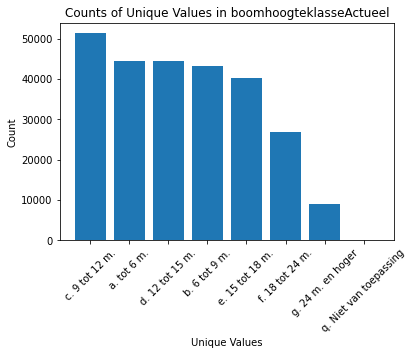

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Count the occurrences of each unique value in the column
value_counts = trees['boomhoogteklasseActueel'].value_counts()

# Plot a bar chart
plt.bar(value_counts.index, value_counts.values)
plt.title('Counts of Unique Values in boomhoogteklasseActueel')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [31]:
hbs_lijnen = pd.read_csv(r'HBS_LIJNEN.csv')
hbs_lijnen

,OBJECTNUMMER,ElementID,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,1,"LINESTRING(4.969756 52.355647,4.969934 52.3555...","LINESTRING(52.355647 4.969756,52.355579 4.9699...",4.994925,52.330226
1,2,2,"LINESTRING(4.748164 52.407466,4.748079 52.4072...","LINESTRING(52.407466 4.748164,52.407288 4.7480...",4.746942,52.402232
2,3,3,"LINESTRING(4.749585 52.412086,4.74933 52.41023...","LINESTRING(52.412086 4.749585,52.41023 4.74933...",4.748875,52.409776
3,4,4,"LINESTRING(4.727775 52.330301,4.732677 52.3337...","LINESTRING(52.330301 4.727775,52.333711 4.7326...",4.743627,52.342176
4,5,5,"LINESTRING(4.762931 52.352633,4.762383 52.3521...","LINESTRING(52.352633 4.762931,52.352143 4.7623...",4.745357,52.341189
...,...,...,...,...,...,...
818,819,819,"LINESTRING(4.972688 52.298624,4.978021 52.3005...","LINESTRING(52.298624 4.972688,52.300511 4.9780...",4.975408,52.303100
819,820,820,"LINESTRING(4.971056 52.308392,4.967626 52.312162)","LINESTRING(52.308392 4.971056,52.312162 4.967626)",4.969341,52.310277
820,821,821,"LINESTRING(4.947073 52.299899,4.954937 52.3026...","LINESTRING(52.299899 4.947073,52.302613 4.9549...",4.951005,52.303238
821,822,822,"LINESTRING(4.950842 52.29499,4.947469 52.29870...","LINESTRING(52.29499 4.950842,52.298701 4.94746...",4.949000,52.297222


In [35]:
import os
print('Get current working directory : ', os.getcwd())

Get current working directory :  /home/alihan/Desktop/UVA 2023-2024/Data Systems Project/Data


In [36]:
Storm_Data_Incidents = pd.read_csv(r'/home/alihan/Desktop/UVA 2023-2024/Data Systems Project/Data/FiredepartmentData2023/Main Data/Stom_Data_Incidents.csv')
Storm_Data_Incidents

,Incident_ID,Date,Incident_Starttime,Incident_Endtime,Incident_Duration,Incident_Priority,Service_Area,Municipality,Damage_Type,LON,LAT
0,511,2018-09-07,08:25:18,10:00:56,01:35:38,2,Amstelveen,Amstelveen,Tree,4.838685,52.281552
1,738,2018-09-10,16:46:38,18:00:55,01:14:17,2,Victor,Amsterdam,Tree,4.930968,52.359724
2,739,2018-09-10,17:11:20,18:01:00,00:49:40,2,Dirk,Amsterdam,Building,4.898818,52.357071
3,1335,2018-09-18,19:17:33,20:41:29,01:23:56,2,Zebra,Amsterdam,"Fence, Road signs, Scaffolding",4.960809,52.392155
4,1493,2018-09-21,06:59:05,08:21:25,01:22:20,2,Amstelveen,Amstelveen,Tree,4.879741,52.301365
...,...,...,...,...,...,...,...,...,...,...,...
995,293411,2018-01-18,10:31:10,11:20:21,00:49:11,2,Victor,Amsterdam,Tree,4.928020,52.369366
996,293412,2018-01-18,10:31:54,12:59:04,02:27:10,1,Aalsmeer,Aalsmeer,Tree,4.780278,52.254294
997,293416,2018-01-18,10:34:36,12:23:29,01:48:53,2,GBA,Amsterdam,Building,4.784050,52.391989
998,293417,2018-01-18,10:35:00,11:20:18,00:45:18,5,GBA,Amsterdam,"Fence, Road signs, Scaffolding",4.841591,52.394677


In [37]:
Storm_Data_Deployments = pd.read_csv(r'/home/alihan/Desktop/UVA 2023-2024/Data Systems Project/Data/FiredepartmentData2023/Main Data/Stom_Data_Deployments.csv')
Storm_Data_Deployments

,Deployment_ID,Incident_ID,Vehicle_Type,Vehicle_Role,Fire_Station,Fire_Station_Service_Status,Driving_Time_To_Incident
0,4,738,AL,RV,Victor,Professional,114.0
1,8,1507,TS,TS,Teunis,Professional,633.0
2,12,1548,TS,TS,Pieter,Professional,467.0
3,16,1555,TS,TS,Willem,Professional,166.0
4,20,1565,TS,TS,Aalsmeer,Volunteer,151.0
...,...,...,...,...,...,...,...
995,3984,391885,AL,RV,Dirk,Professional,98.0
996,3988,391899,AL,RV,Dirk,Professional,101.0
997,3992,391912,AL,AL,Amstelveen,Professional,245.0
998,3996,392012,TS,TS,Osdorp,Professional,NaN


In [38]:
Fire_Stations_and_Vehicles = pd.read_csv(r'/home/alihan/Desktop/UVA 2023-2024/Data Systems Project/Data/FiredepartmentData2023/Main Data/Fire_Stations_and_Vehicles.csv')
Fire_Stations_and_Vehicles

,Fire_Station,Vehicle,Vehicle_Type
0,Aalsmeer,Tankautospuit,TS
1,Aalsmeer,Haakarmvoertuig met kraan,RV
2,Aalsmeer,Haakarmvoertuig,RV
3,Aalsmeer,Tankautospuit,TS
4,Amstelveen,Waterongevallenvoertuig,WO
5,Amstelveen,Tankautospuit,TS
6,Amstelveen,Autoladder,AL
7,Amstelveen,HV met kraan,RV
8,Amstelveen Vrijwillig,Tankautospuit,TS
9,Amstelveen Vrijwillig,Schuimblusvoertuig,TS


Datasets description

------------------------
- Storm Data Incidents -
------------------------
This dataset includes all incidents that have been flagged as storm damage by the centralist.
There are 4 classification of damage types:
- Tree
- Building
- Fence, Road signs, Scaffolding
- Unknown
These are not mutually exclusive. Unknown damage types are incident where the damage type has not been recorded.
Service Area refers to the location of the incident, not the responding fire department.
Incident priority (P1-P3) is based on their severity and impact where P1 incidents have the highest priority.
Latitude and longitude are written in WGS84 DD coordinates.

-------------------------
- Storm Data Deployment -
-------------------------
This dataset includes all deployed vehicles during the storm data incidents.
There are 3 main vehicle types:
- Autoladder (AL) when a ladder is needed.
- Redvoertuig (RV) when general health care is needed.
- Tankautospuit(TS) when a fire needs to be extinguished.
- Waterongevallenvoertuig (WO) when incidents occur in the water.
In certain situations, a vehicle may assume a role that doesn't align with its typical type when additional assistance is required.
All fire stations have a designated crew. This can be professionals or volunteers.
Generally speaking the response time of volunteers are slower compared to professionals.
Driving time to incident is in seconds.

-----------------------------
- Fire Stations and Vehicles -
-----------------------------
This is a list with all the first-line vehicles stationed at the fire stations and there respective vehicle type.
Fire station Amstelveen is the only location where both professionals or volunteers occupy the same fire station. 
However they use their own vehicles as shown in the list.